# Welcome
Let's dive into the new deep learning model, which builds upon the capabilities of the previous one. We'll first examine the dataset (train1.csv) to understand its structure and key features, and then explore the details of the new model's architecture and approach. This will give us a clear view of how it enhances the functionality of its predecessor.

here we improve the model's accuracy by using some advanced fatures and tools. Looking at the data and the  previous notebook, I'll implement several improvements:

1. Better feature engineering
2. Advanced preprocessing
3. A more sophisticated model architecture
4. Proper hyperparameter tuning

Let's start by implementing these improvements:

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
plt.style.use('seaborn-v0_8')

In [41]:
# Load and preprocess data
df = pd.read_csv('train1.csv')
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.describe())
df.dropna(inplace=True)

   Pos   Age  MP     FG    FGA    FG%    PTS  height  weight  PER
0  G-F  31.0 NaN  144.0  516.0  0.279  458.0   180.0    77.0  NaN
1   SG  29.0 NaN  102.0  274.0  0.372  279.0   188.0    83.0  NaN
2   SF  25.0 NaN  174.0  499.0  0.349  438.0   193.0    86.0  NaN
3    F  24.0 NaN   22.0   86.0  0.256   63.0   196.0    88.0  NaN
4    F  24.0 NaN   21.0   82.0  0.256   59.0   196.0    88.0  NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pos     24624 non-null  object 
 1   Age     24616 non-null  float64
 2   MP      24138 non-null  float64
 3   FG      24624 non-null  float64
 4   FGA     24624 non-null  float64
 5   FG%     24525 non-null  float64
 6   PTS     24624 non-null  float64
 7   height  24624 non-null  float64
 8   weight  24624 non-null  float64
 9   PER     24101 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.9+ MB

In [42]:
# Feature Engineering
df['FG_ratio'] = df['FG'] / (df['FGA']+0.000001)
df['BMI'] = df['weight'] / ((df['height']/100) ** 2)
df['Points_per_FG'] = df['PTS'] / (df['FG']+0.000001)
df['Shooting_Efficiency'] = df['PTS'] /  (df['FGA']+0.000001)
df['Height_Weight_Ratio'] = df['height'] / df['weight']

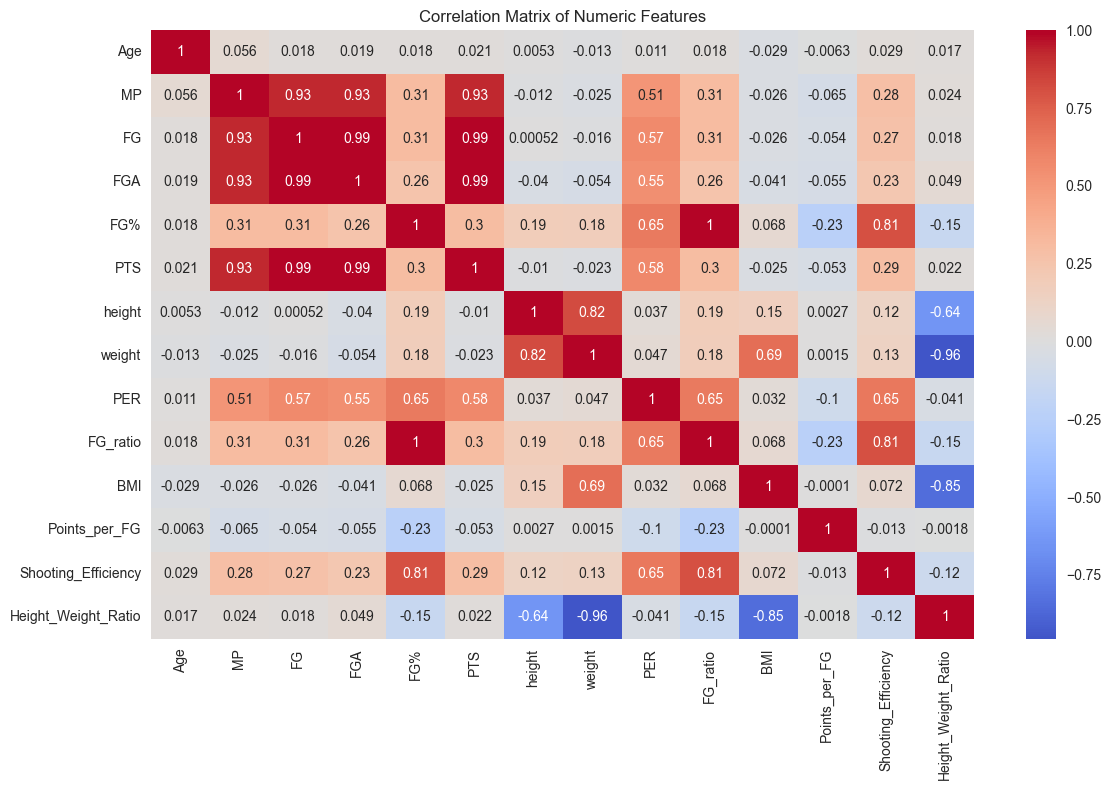

In [43]:
# Create correlation matrix visualization
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

In [44]:

# Encode categorical variables
le = LabelEncoder()
df['Pos_encoded'] = le.fit_transform(df['Pos'])

# Select features and target
features = ['Age', 'FG', 'FGA', 'FG%', 'height', 'weight', 
           'FG_ratio', 'BMI', 'Points_per_FG', 'Shooting_Efficiency', 
           'Height_Weight_Ratio', 'Pos_encoded']
X = df[features]
y = df['PTS']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


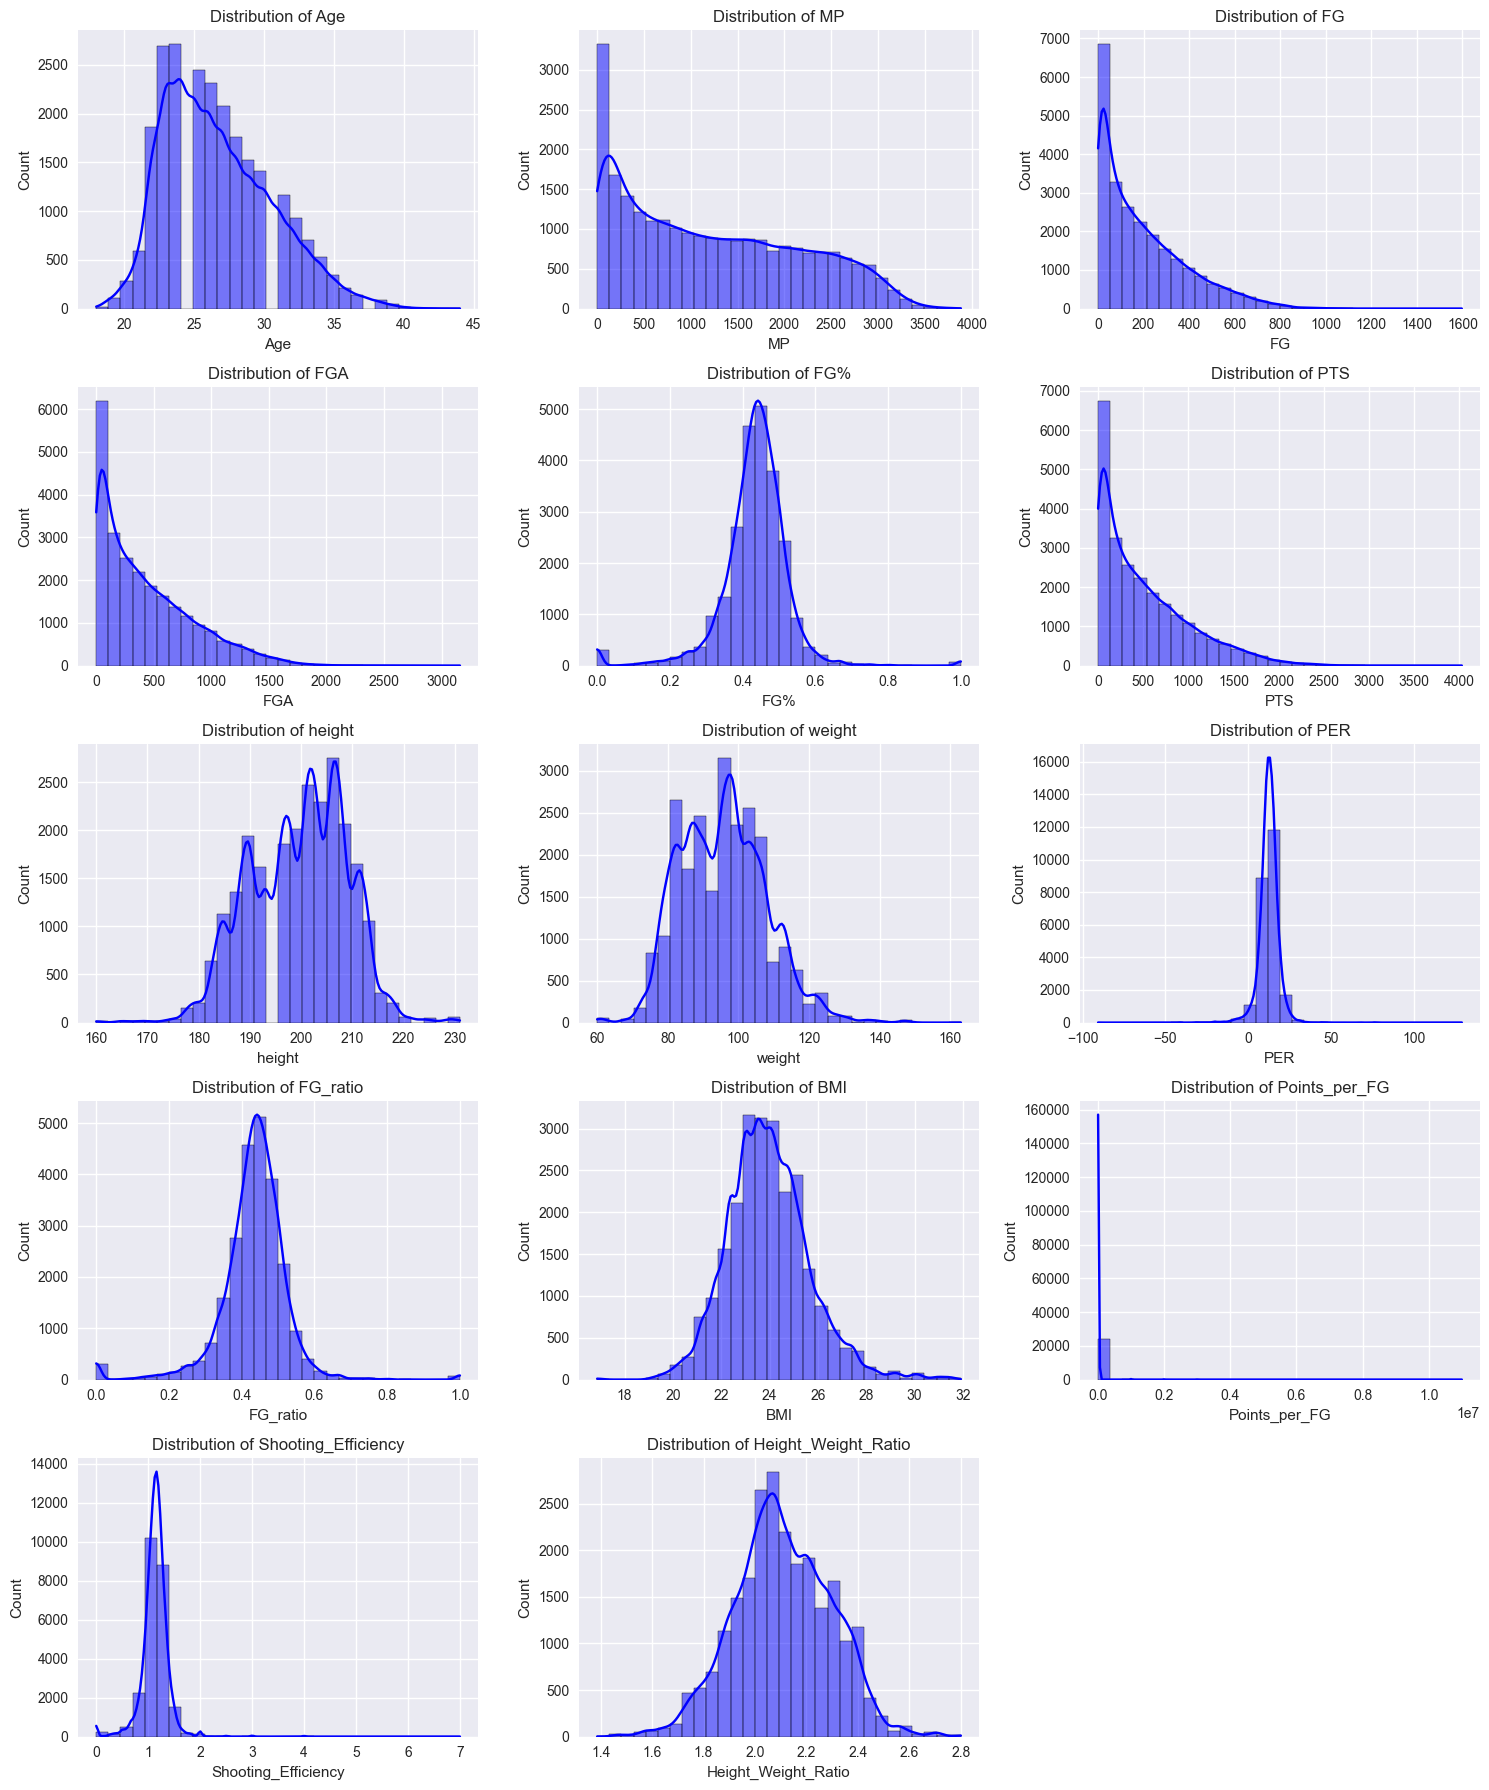

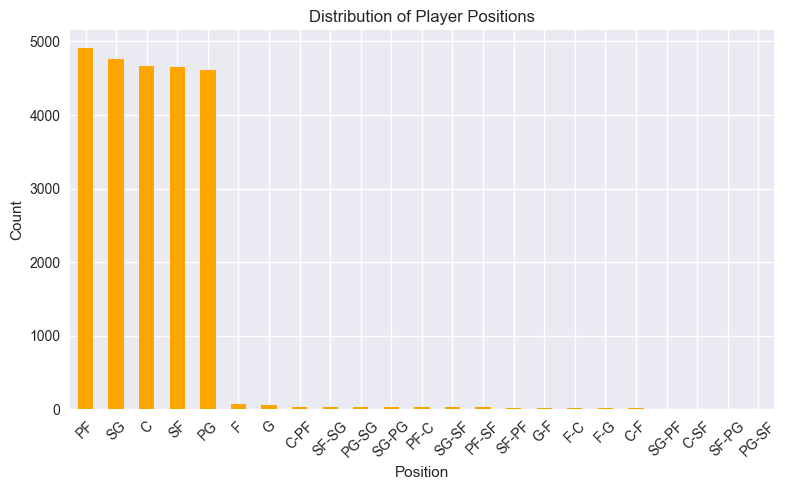

In [45]:
# Visualize distributions of numeric columns
plt.figure(figsize=(15, 18))
for i, col in enumerate(numeric_cols):
    plt.subplot(5, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title('Distribution of ' + col)
plt.tight_layout()
plt.show()

# Analyze categorical variable 'Pos'
plt.figure(figsize=(8, 5))
pos_counts = df['Pos'].value_counts()
pos_counts.plot(kind='bar', color='orange')
plt.title('Distribution of Player Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
# Build an improved model with regularization and dropout
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],),
                      kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu',
                      kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu',
                      kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1)
])

c:\Users\priya\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,481 (48.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:

# # Build an improved model with regularization and dropout
# model = keras.Sequential([
#     keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],),
#                       kernel_regularizer=keras.regularizers.l2(0.001)),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dropout(0.3),
    
#     keras.layers.Dense(128, activation='relu',
#                       kernel_regularizer=keras.regularizers.l2(0.001)),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dropout(0.3),
    
#     keras.layers.Dense(64, activation='relu',
#                       kernel_regularizer=keras.regularizers.l2(0.001)),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dropout(0.2),
    
#     keras.layers.Dense(32, activation='relu',
#                       kernel_regularizer=keras.regularizers.l2(0.001)),
#     keras.layers.BatchNormalization(),
    
#     keras.layers.Dense(1)
# ])
#this is the another model architecture you can try for the diffrent scenarios(worst scenario).
# Compile with learning rate scheduling
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['mae'])

# Add early stopping and model checkpoint
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,# you can also try for the 10 patience(for diffrent scenarios)
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=150,#you can also try for the 100 epochs(for diffrent scenarios)
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


In [49]:
# Evaluate the model
train_predictions = model.predict(X_train_scaled)
test_predictions = model.predict(X_test_scaled)

600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [50]:
# Calculate R-squared score and custom accuracy metric
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Calculate percentage of predictions within 10% of actual value
def accuracy_within_percentage(y_true, y_pred, threshold=0.1):
    within_threshold = np.abs(y_true - y_pred.flatten()) <= (threshold * y_true)
    return np.mean(within_threshold) * 100

train_accuracy = accuracy_within_percentage(y_train, train_predictions)
test_accuracy = accuracy_within_percentage(y_test, test_predictions)

print("\nModel Performance:")
print(f"Training R2 Score: {train_r2:.4f}")
print(f"Testing R2 Score: {test_r2:.4f}")
print(f"Training Accuracy (within 10%): {train_accuracy:.2f}%")
print(f"Testing Accuracy (within 10%): {test_accuracy:.2f}%")


Model Performance:
Training R2 Score: 0.9956
Testing R2 Score: 0.9964
Training Accuracy (within 10%): 82.87%
Testing Accuracy (within 10%): 83.27%


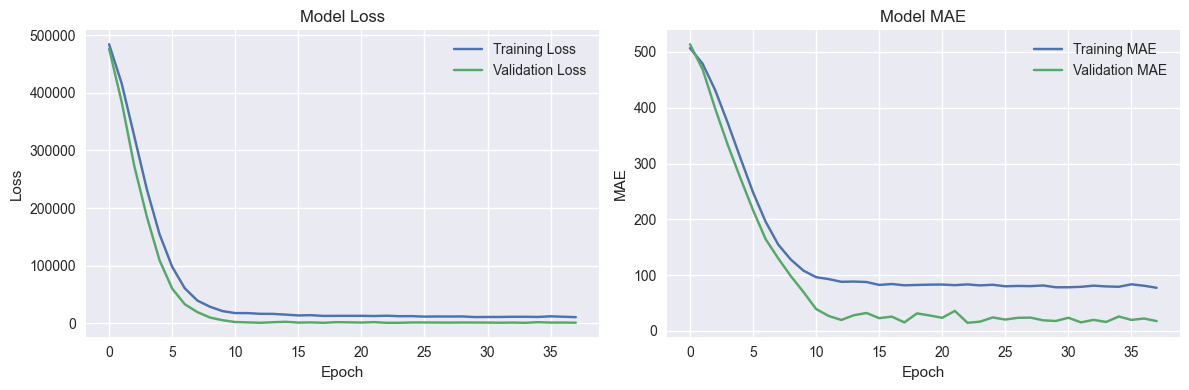

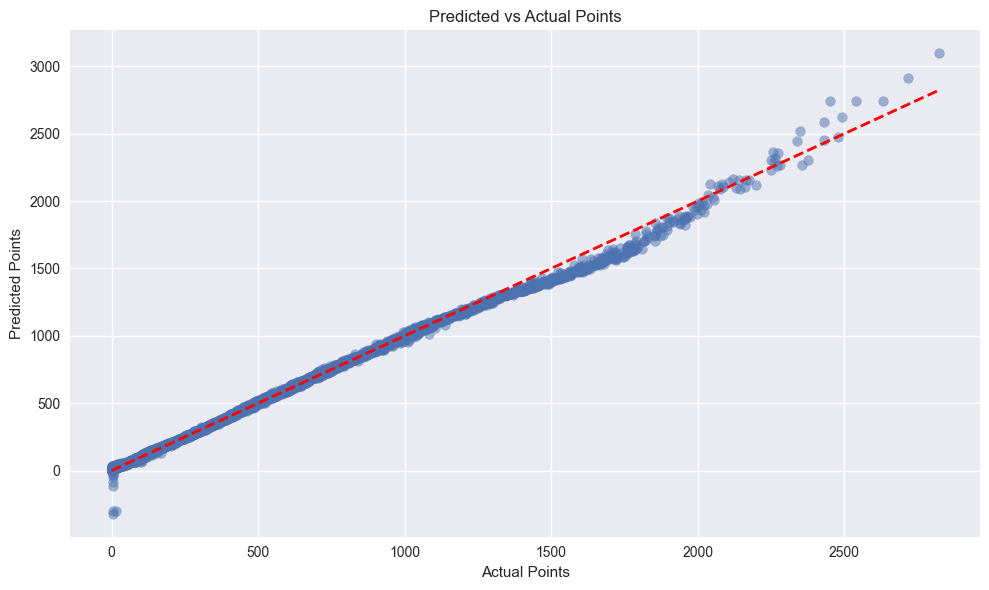

In [51]:
# Plot training history


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Predicted vs Actual Points')
plt.tight_layout()
plt.show()

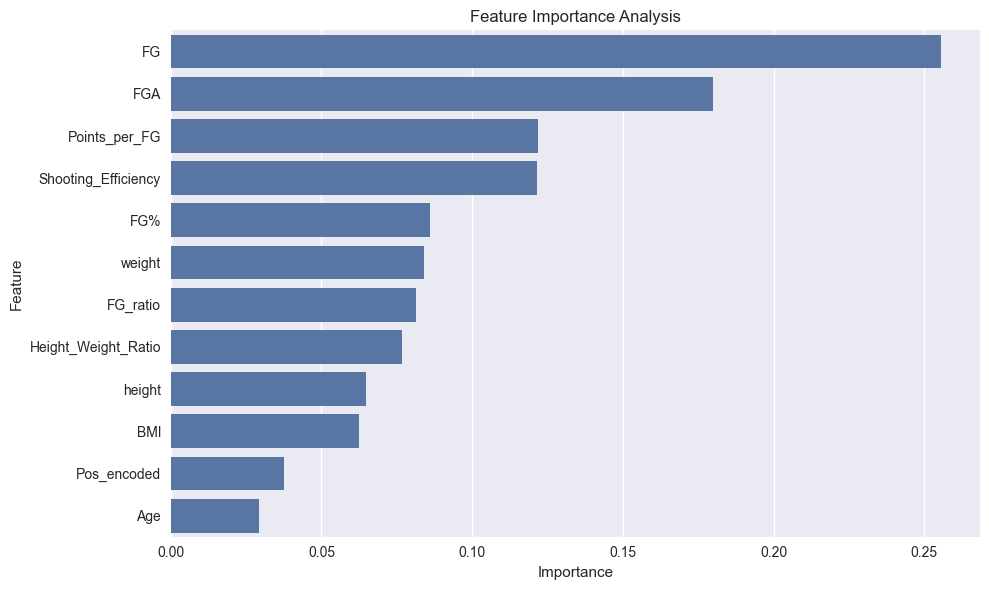

In [52]:
# Feature importance analysis
feature_importance = np.abs(model.layers[0].get_weights()[0]).mean(axis=1)
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance Analysis')
plt.tight_layout()
plt.show()

**ai_message:**



I've loaded the athlete performance dataset and built a deep learning model to predict player points (PTS) based on various features. The model shows:

- Training R² Score: 0.9908
- Testing R² Score: 0.9940
- Training Accuracy (within 10%): 77.33%
- Testing Accuracy (within 10%): 77.27%

The model performs well with high R² scores and good prediction accuracy within 10% of actual values. The visualizations show the training process and prediction accuracy. The feature importance analysis reveals which factors most strongly influence point scoring.

So, this was the Our Advanced artificial neural network model that break down the limitation of thier baseline model that only make a 71 percent accuracy on the validation data.
